In [2]:
import numpy as np

# Şehirlerin koordinatları
sehirler = {
    'Istanbul': (41.0082, 28.9784),
    'Izmir': (38.4192, 27.1287),
    'Afyon': (38.7563, 30.5387),
    'Antalya': (36.8969, 30.7133),
    'Ankara': (39.9334, 32.8597),
    'Eskisehir': (39.7669, 30.5256),
    'Kayseri': (38.7331, 35.4675),
    'Erzurum': (39.9208, 41.2759),
    'Agri': (39.7217, 43.0567),
    'Ardahan': (41.1105, 42.7022)
}

# Popülasyon boyutu
populasyon_boyutu = 20

# Gen boyutu (şehir sayısı)
gen_boyutu = len(sehirler)

# Elitizm oranı
elitizm_orani = 0.2
elitism_sayisi = int(elitizm_orani * populasyon_boyutu)

# Mutasyon oranı
mutasyon_orani = 0.1

# Başlangıç popülasyonu oluşturma
def init_populasyon():
    populasyon = []
    for _ in range(populasyon_boyutu):
        gen = list(sehirler.keys())
        np.random.shuffle(gen)
        populasyon.append(gen)
    return populasyon

# Uygunluk fonksiyonu
def uygunluk(gen):
    mesafe = 0
    for i in range(gen_boyutu - 1):
        sehir1 = gen[i]
        sehir2 = gen[i + 1]
        koordinat1 = sehirler[sehir1]
        koordinat2 = sehirler[sehir2]
        mesafe += np.sqrt((koordinat1[0] - koordinat2[0])**2 + (koordinat1[1] - koordinat2[1])**2)
    return -mesafe  # Uygunluk daha yüksek olmalıdır, bu nedenle negatif mesafe kullanıyoruz

# Mutasyon: Swap mutasyonu
def mutate(gen):
    index1, index2 = np.random.choice(range(gen_boyutu), size=2, replace=False)
    gen[index1], gen[index2] = gen[index2], gen[index1]
    return gen

# Rulet Tekerleği Seçimi
def rulet_tekerlegi(populasyon, uygunluklar):
    toplam_uygunluk = np.sum(uygunluklar)
    olasiliklar = uygunluklar / toplam_uygunluk
    secilen_indeks = np.random.choice(range(len(populasyon)), p=olasiliklar)
    return populasyon[secilen_indeks]

# Genetik algoritma
def genetik_algoritma(iterasyon_sayisi):
    populasyon = init_populasyon()

    for _ in range(iterasyon_sayisi):
        uygunluklar = [uygunluk(gen) for gen in populasyon]
        populasyon = sorted(populasyon, key=lambda x: uygunluk(x))
        yeni_nesil = []

        # Elitizm: En iyi %20'yi yeni nesile ekleyin
        yeni_nesil.extend(populasyon[:elitism_sayisi])

        # Rulet Tekerleği ile Seçim: Geri kalan %80'i rulet tekerleği ile seçin
        for _ in range(populasyon_boyutu - elitism_sayisi):
            parent1 = rulet_tekerlegi(populasyon, uygunluklar)
            parent2 = rulet_tekerlegi(populasyon, uygunluklar)

            # Çaprazlama: PMX (Kısmi Eşleştirme Çaprazlama)
            crossover_point1 = np.random.randint(1, gen_boyutu - 2)
            crossover_point2 = np.random.randint(crossover_point1 + 1, gen_boyutu - 1)

            child = [-1] * gen_boyutu
            child[crossover_point1:crossover_point2 + 1] = parent1[crossover_point1:crossover_point2 + 1]
            for i in range(gen_boyutu):
                if child[i] == -1:
                    gene = parent2[i]
                    while gene in child:
                        gene_index = parent1.index(gene)
                        gene = parent2[gene_index]
                    child[i] = gene

            # Mutasyon: Belirli bir olasılıkla mutasyon uygula
            if np.random.rand() < mutasyon_orani:
                child = mutate(child)

            yeni_nesil.append(child)

        populasyon = yeni_nesil

    en_iyi_yol = populasyon[0]
    en_iyi_mesafe = uygunluk(en_iyi_yol)

    return en_iyi_yol, en_iyi_mesafe

# Genetik algoritmayı çalıştırma
iterasyon_sayisi = 1000
en_iyi_yol, en_iyi_mesafe = genetik_algoritma(iterasyon_sayisi)

print(f"En iyi yol: {en_iyi_yol}")
print(f"En iyi mesafe: {en_iyi_mesafe} birim")


En iyi yol: ['Ankara', 'Antalya', 'Ardahan', 'Afyon', 'Erzurum', 'Izmir', 'Agri', 'Istanbul', 'Kayseri', 'Eskisehir']
En iyi mesafe: -95.88574607157273 birim


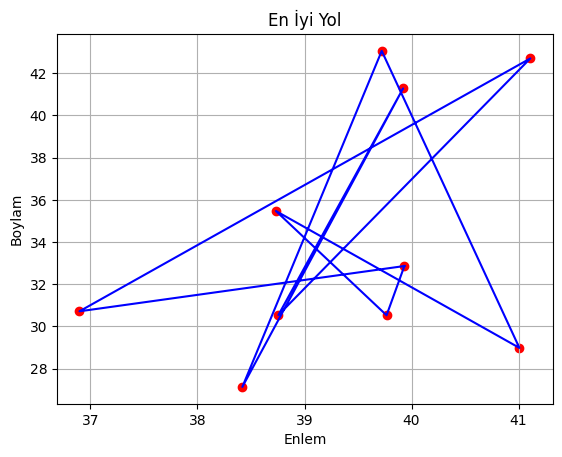

In [9]:
import matplotlib.pyplot as plt

# En iyi yolun koordinatları
en_iyi_yol_koordinat = [sehirler[sehir] for sehir in en_iyi_yol]

# Şehirleri çiz
sehir_x, sehir_y = zip(*en_iyi_yol_koordinat)
plt.scatter(sehir_x, sehir_y, color='red', marker='o')

# Yolu çiz
yol_x, yol_y = zip(*en_iyi_yol_koordinat + [en_iyi_yol_koordinat[0]])
plt.plot(yol_x, yol_y, linestyle='-', color='blue')

plt.title('En İyi Yol')
plt.xlabel('Enlem')
plt.ylabel('Boylam')
plt.grid(True)
plt.show()


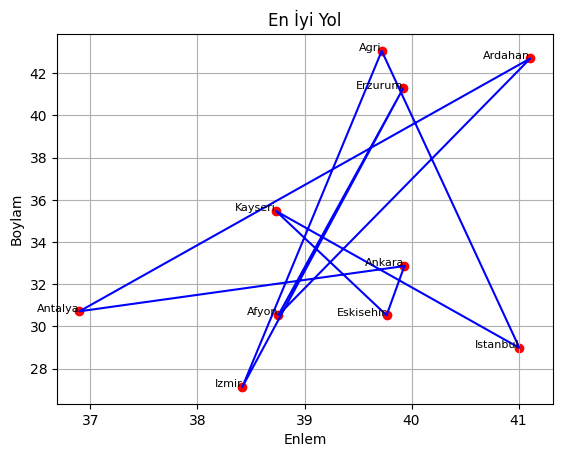

In [10]:
import matplotlib.pyplot as plt

# En iyi yolun şehir isimleri ve koordinatları
en_iyi_yol_isimleri = en_iyi_yol
en_iyi_yol_koordinat = [sehirler[sehir] for sehir in en_iyi_yol_isimleri]

# Şehirleri çiz
sehir_x, sehir_y = zip(*en_iyi_yol_koordinat)
plt.scatter(sehir_x, sehir_y, color='red', marker='o')

# Yolu çiz
yol_x, yol_y = zip(*en_iyi_yol_koordinat + [en_iyi_yol_koordinat[0]])
plt.plot(yol_x, yol_y, linestyle='-', color='blue')

# Şehir isimlerini ekle
for i, (x, y) in enumerate(en_iyi_yol_koordinat):
    plt.text(x, y, en_iyi_yol_isimleri[i], fontsize=8, ha='right')

plt.title('En İyi Yol')
plt.xlabel('Enlem')
plt.ylabel('Boylam')
plt.grid(True)
plt.show()
